In [2]:

import  pyodbc as py
import pandas as pd 
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
print(py.drivers())



['SQL Server', 'ODBC Driver 17 for SQL Server']


In [3]:
conn='mssql+pyodbc://3OFY\\SQLEXPRESS/sales_3of?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'

In [4]:
engine=create_engine(conn)

In [5]:
query='''SELECT 
    s.OrderID,
    s.Date,
    c.CustomerName,
    r.RegionName,
    p.ProductName,
    s.Quantity,
    s.UnitPrice,
    (s.Quantity * s.UnitPrice) AS TotalAmount
FROM Sales s
JOIN Customers c ON s.CustomerID = c.CustomerID
JOIN Regions r ON c.RegionID = r.RegionID
JOIN Products p ON s.ProductID = p.ProductID
ORDER BY s.OrderID;
'''

In [6]:
df=pd.read_sql_query(query,engine)
print(df)

    OrderID        Date    CustomerName       RegionName  \
0         1  2024-01-01       Ahmed Ali            Cairo   
1         2  2024-01-03    Sara Youssef             Giza   
2         3  2024-01-05  Mostafa Hassan       Alexandria   
3         4  2024-01-06   Fatma Ibrahim         Mansoura   
4         5  2024-01-08   Youssef Tarek            Aswan   
..      ...         ...             ...              ...   
95       96  2024-09-26      Alaa Gamal             Qena   
96       97  2024-09-29   Menna Youssef         Hurghada   
97       98  2024-10-02    Hazem Khalil  Sharm El Sheikh   
98       99  2024-10-05    Nada Mostafa   6th of October   
99      100  2024-10-08       Omar Ehab        New Cairo   

              ProductName  Quantity  UnitPrice  TotalAmount  
0           iPhone 14 Pro         2    25000.0      50000.0  
1      Samsung Galaxy S23         1    18000.0      18000.0  
2    Dell 24-Inch Monitor         3     7000.0      21000.0  
3   HP ProBook 450 Laptop      

In [7]:

region_orders = df.groupby('RegionName').agg({'OrderID':'count'}).reset_index()
region_orders.rename(columns={'OrderID':'OrdersCount'}, inplace=True)

print(region_orders)




         RegionName  OrdersCount
0    6th of October            5
1        Alexandria            5
2             Aswan            5
3         Beni Suef            5
4             Cairo            5
5          Damietta            5
6            Fayoum            5
7              Giza            5
8          Hurghada            5
9          Ismailia            5
10            Luxor            5
11         Mansoura            5
12            Minya            5
13        New Cairo            5
14        Port Said            5
15             Qena            5
16  Sharm El Sheikh            5
17             Suez            5
18            Tanta            5
19          Zagazig            5


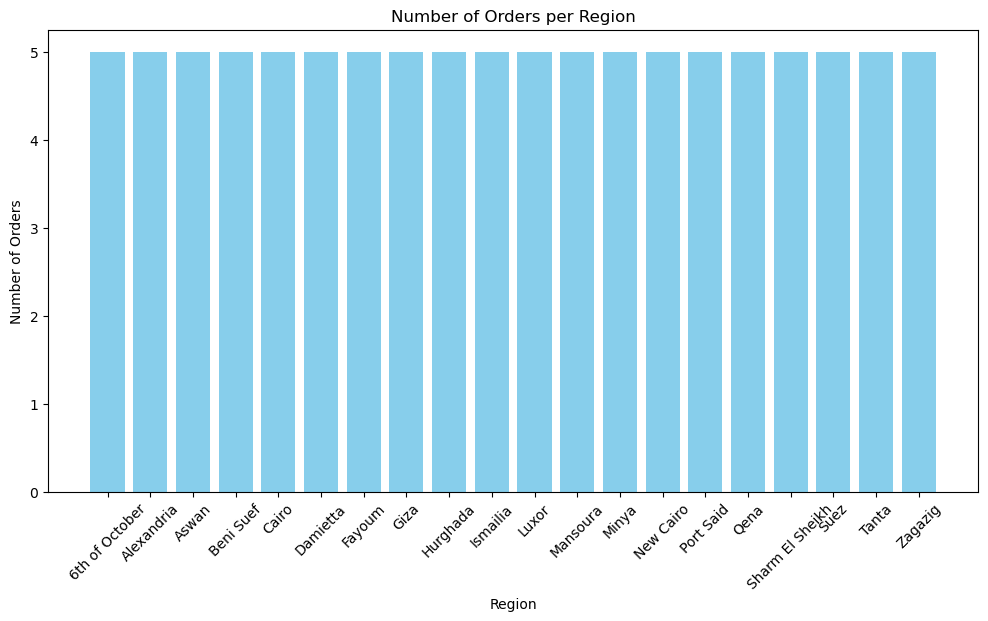

In [8]:
plt.figure(figsize=(12,6))
plt.bar(region_orders['RegionName'], region_orders['OrdersCount'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Region')
plt.show()


In [9]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [10]:
print(region_orders.columns)


Index(['RegionName', 'OrdersCount'], dtype='object')


In [11]:
region_orders.to_excel(r'C:\Users\TEESLA\OneDrive\Desktop\RegionOrders.xlsx', index=False)